In [5]:
%matplotlib inline

import pdb
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Neural net cost function with regularization

In [6]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size,
                     num_labels, X, y, lam):
    # nn_cost_function Implements the neural network cost function for a two layer
    # neural network which performs classification
    #   J, grad = nn_cost_function(nn_params, hidden_layer_size, num_labels,
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices.
    #
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.

    # Reshape nn_params back into the parameters theta1 and theta2
    # for our 2 hidden-layer neural network
    theta1 = nn_params['Theta1'] #25x401
    theta2 = nn_params['Theta2'] #10x26
    
    J = 0
    num_samples = X.shape[0]
    theta1_grad = np.zeros(theta1.shape)
    theta2_grad = np.zeros(theta2.shape)

    # add bias to the input data
    bias = np.ones((num_samples, 1))
    X1 = np.concatenate((bias, X), axis=1)
    
    # forward propagate
    layer1 = sigmoid(theta1.dot(X1.T))
    bias = np.ones((1, layer1.shape[1]))
    layer2 = np.concatenate((bias, layer1), axis=0)
    output = sigmoid(theta2.dot(layer2))

    # reshape y to nn format, one hot encoding
    ynn = np.zeros((num_samples, num_labels))
    for i in range(num_samples):
        ynn[i, y[i] -1] = 1 # column 10 represents digit 0
    #end
    ynn = ynn.T
    
    # cost function - first without regularization
    J = (-1 / num_samples) * np.sum(np.sum( ynn * np.log(output) + (1 - ynn) * np.log(1 - output) ))
    
    # cost function - first with regularization
    sum_layer1 = np.sum(np.sum( theta1[:, 1:-1] **2 ))
    sum_layer2 = np.sum(np.sum( theta2[:, 1:-1] **2 ))
    reg = (lam / (2 * num_samples)) * (sum_layer1 + sum_layer2)
    J = J + reg
        
    # backpropogation, calculation of gradients
    for t in range(num_samples):
        # step 1: forward propagate
        a1 = X1[t, :]
        z2 = theta1.dot(a1.T)
        a2 = sigmoid(z2)
        z2 = np.insert(z2, 0, 1) # need to account for the bias
        a2 = np.insert(a2, 0, 1) # need to account for the bias
        z3 = theta2.dot(a2.T)
        a3 = sigmoid(z3)
        
        # step 2: compute error
        delta3 = a3 - ynn[:, t]

        # step 3: back propagate error through activation function
        delta2 = (theta2.T.dot(delta3)) * (a2 * (1 - a2))
        # step 4: update weights
        theta2_grad = theta2_grad + np.outer(delta3, a2)
        theta1_grad = theta1_grad + np.outer(delta2[1:], a1)
    # end

    # step 5: average gradient update
    theta1_grad = theta1_grad / num_samples
    theta2_grad = theta2_grad / num_samples
    
    # regularization
    theta1_tmp = np.copy(theta1)
    theta1_tmp[:, 0] = 0 # don't regularize bias terms
    theta1_grad = theta1_grad + lam * theta1_tmp / num_samples
    theta2_tmp = np.copy(theta2)
    theta2_tmp[:, 0] = 0
    theta2_grad = theta2_grad + lam * theta2_tmp / num_samples

    # unroll gradients
    theta1_flat = theta1_grad.flatten()
    theta2_flat = theta1_grad.flatten()
    grad = np.concatenate((theta1_flat, theta2_flat))

    return J, grad
#end


def sigmoid(z):
    # sigmoid Compute sigmoid functoon
    # g = sigmoid(z) computes the sigmoid of z
    g = 1 / (1 + np.exp(-z))
    return g
# end


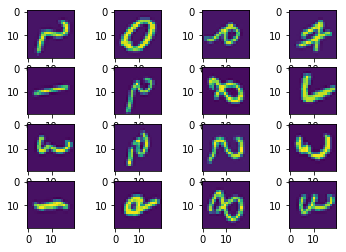

Cost without regularization: 0.2876 

Cost with regularization: 0.3811 



In [7]:
# 5000 Mnist digits
data = loadmat('ex4data1.mat')
X = data['X']
y = data['y']

# 5000 samples, 500 from each class
n = X.shape[0]

# num of pixels per sample
d = X.shape[1]

# digits from 0 through 9
c = np.unique(y).size

# randomly select 16 image to display
fig = plt.figure()
for i in range(1, 17):
    index = np.random.randint(low=0, high=4999, size=1)
    image = np.reshape(X[index, :], (20, 20))
    fig.add_subplot(4, 4, i)
    plt.imshow(image)
# end
plt.show()

# load pre-learned weights
weights = loadmat('ex4weights.mat')

# cost without regularization
lam = 0
J, grad = nn_cost_function(weights, n, weights['Theta1'].shape[0], c, X, y, lam)
print('Cost without regularization: %2.4f \n' % J)

# cost with regularization
lam = 1
J, grad = nn_cost_function(weights, n, weights['Theta1'].shape[0], c, X, y, lam)
print('Cost with regularization: %2.4f \n' % J)
